In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import os
os.getcwd()
os.chdir(r'C:\Users\rahul_000\Downloads') 

In [4]:
df0 = pd.read_csv('Salaries.csv')

In [5]:
# EDA
df0.Benefits = df0.Benefits.fillna(0)

In [6]:
df0.shape

(148654, 13)

In [7]:
df0.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

In [8]:
dfm = df0.head(100)

In [13]:
dfm.JobTitle.head(10)

0    GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY
1                   CAPTAIN III (POLICE DEPARTMENT)
2                   CAPTAIN III (POLICE DEPARTMENT)
3              WIRE ROPE CABLE MAINTENANCE MECHANIC
4      DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)
5                         ASSISTANT DEPUTY CHIEF II
6                BATTALION CHIEF, (FIRE DEPARTMENT)
7                    DEPUTY DIRECTOR OF INVESTMENTS
8                BATTALION CHIEF, (FIRE DEPARTMENT)
9            CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)
Name: JobTitle, dtype: object

In [10]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
s=set(stopwords.words('english'))

In [11]:
# df['JobFamily'] = np.nan

# mm = []
# for j in df.JobTitle: 
#     tokenizer = RegexpTokenizer(r'\w+')
#     k = tokenizer.tokenize(j)
    
# #     for i in k:
# #         if i not in s:
# #             mm.append(format(i))
    
#     mm = filter(lambda w: not w in s,k)
    
#     df.JobFamily[j] = mm
#     mm = []

## Advanced 1a) 

#### We are creating a new column called nonbasepay which adds overtime + otherpay + benefits
#### we groupby and create a Dataframe to visualize the YOY trends of the basepay and nonbasepay line plots.

In [14]:
df1 = df0

In [15]:

df1['nonbasepay'] = df1.OvertimePay + df1.OtherPay + df1.Benefits

In [16]:
yoy = df1.groupby(['Year'])['BasePay','nonbasepay'].mean()

The Plot shows that overall basepay is higher than nonbasepay which is trivial and expected and also interesting insight is that the nonbasepay has increased drastically from 2011 to 2012 and maintained a stable trend. while basepay has peaked in 2013 and decreased in 2014


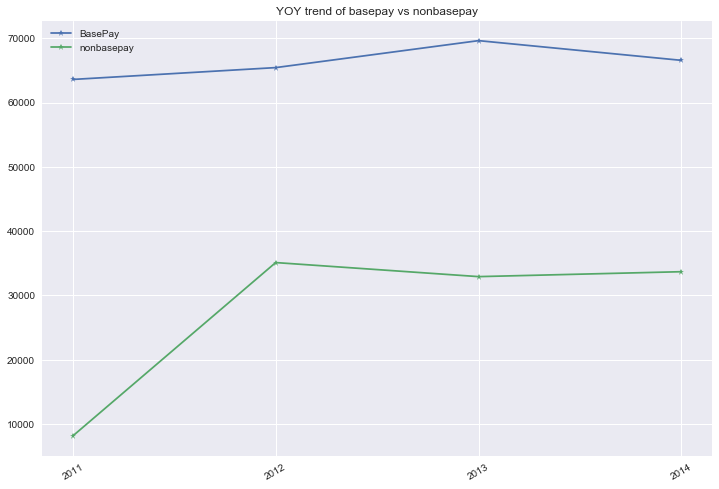

In [158]:
print("The Plot shows that overall basepay is higher than nonbasepay which is trivial and expected and also interesting insight is that the nonbasepay has increased drastically from 2011 to 2012 and maintained a stable trend. while basepay has peaked in 2013 and decreased in 2014")
sns.set_style("darkgrid")

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
# plt.figure(figsize=(12, 8))
plt.plot(yoy.BasePay.values,'*-') 
plt.plot(yoy.nonbasepay.values,'*-')
plt.legend(['BasePay', 'nonbasepay'], loc='upper left')
ticks = np.arange(0,len(yoy.index.values),1)
ax.set_xticks(ticks)
ax.set_xticklabels(yoy.index.values, rotation=30)
ax.set_title('YOY trend of basepay vs nonbasepay')

plt.show()


# Advance Optional Question 2) 

##Approach

##using gender_gusser, finding the gender, while the accuracy is very low. There is no Gender column given, there is a way to figure out gender based on existing built library called gender_guesser which has decent to low accuracy, This can be improvised by creating another of bag of words and re-train it.

In [21]:
import gender_guesser.detector as gender

In [22]:
df2 = df0.head(50) ## Taking 50 records due to computational complexity

In [23]:
df2.shape

(50, 14)

In [24]:
df2

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status,nonbasepay
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,0.0,567595.43,567595.43,2011,NaN,San Francisco,NaN,400184.25
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,0.0,538909.28,538909.28,2011,NaN,San Francisco,NaN,382943.26
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,0.0,335279.91,335279.91,2011,NaN,San Francisco,NaN,122540.78
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,0.0,332343.61,332343.61,2011,NaN,San Francisco,NaN,254427.61
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,0.0,326373.19,326373.19,2011,NaN,San Francisco,NaN,191971.59
5,6,DAVID SULLIVAN,ASSISTANT DEPUTY CHIEF II,118602.00,8601.00,189082.74,0.0,316285.74,316285.74,2011,NaN,San Francisco,NaN,197683.74
6,7,ALSON LEE,"BATTALION CHIEF, (FIRE DEPARTMENT)",92492.01,89062.90,134426.14,0.0,315981.05,315981.05,2011,NaN,San Francisco,NaN,223489.04
7,8,DAVID KUSHNER,DEPUTY DIRECTOR OF INVESTMENTS,256576.96,0.00,51322.50,0.0,307899.46,307899.46,2011,NaN,San Francisco,NaN,51322.50
8,9,MICHAEL MORRIS,"BATTALION CHIEF, (FIRE DEPARTMENT)",176932.64,86362.68,40132.23,0.0,303427.55,303427.55,2011,NaN,San Francisco,NaN,126494.91
9,10,JOANNE HAYES-WHITE,"CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)",285262.00,0.00,17115.73,0.0,302377.73,302377.73,2011,NaN,San Francisco,NaN,17115.73


In [25]:
# Creating a new column called gender by running the gender_guesser package.

df2['Gender'] = np.nan
mm = []
for idx , j in enumerate(df2.EmployeeName): 
    name = j.split()[0]    # taking the first name of the employee
    d = gender.Detector()
    mm = d.get_gender(name)
    df2.Gender[idx] = mm

    

C:\Users\rahul_000\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\rahul_000\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\rahul_000\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users

In [28]:
print("Most of the gender output are unknown for now, but it has some split for males/females/unknown ratios for whole dataset")
df2.Gender.head(10)

Most of the gender output are unknown for now, but it has some split for males/females/unknown ratios for whole dataset


0    unknown
1    unknown
2    unknown
3    unknown
4    unknown
5    unknown
6    unknown
7    unknown
8    unknown
9    unknown
Name: Gender, dtype: object

### Basic Datamining 

#### Out approach is to find the Jobfamily, one approach was to find the topics based on topics modelling (LDA) and creating a huge topic cluster (say 200 classes or so ), I am taking 20 top-level/major topics/Jobfamily and creating a column with it. 

#### after getting the column this helps in finding the text patterns


In [73]:
df = df0.head(500) ## considering complete sample dataset with ~500 records

In [30]:
#importing packages and processing for normalizing the doc/string set
from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer
import string

stop = set(stopwords.words('english'))

exclude = set(string.punctuation) #excludes punctuations
lemma = WordNetLemmatizer() #lemmatization
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized  # normalizing

In [31]:
doc_complete = df.JobTitle.tolist()
doc_clean = [clean(doc).split() for doc in doc_complete]



In [ ]:
df['JobTitle'].apply(clean)

In [32]:
doc_clean.head(100)

[['general', 'managermetropolitan', 'transit', 'authority'],
 ['captain', 'iii', 'police', 'department'],
 ['captain', 'iii', 'police', 'department'],
 ['wire', 'rope', 'cable', 'maintenance', 'mechanic'],
 ['deputy', 'chief', 'departmentfire', 'department'],
 ['assistant', 'deputy', 'chief', 'ii'],
 ['battalion', 'chief', 'fire', 'department'],
 ['deputy', 'director', 'investment'],
 ['battalion', 'chief', 'fire', 'department'],
 ['chief', 'department', 'fire', 'department'],
 ['assistant', 'chief', 'department', 'fire', 'department'],
 ['captain', 'iii', 'police', 'department'],
 ['executive', 'contract', 'employee'],
 ['department', 'head', 'v'],
 ['battalion', 'chief', 'fire', 'department'],
 ['commander', 'iii', 'police', 'department'],
 ['department', 'head', 'v'],
 ['captain', 'emergencycy', 'medical', 'service'],
 ['battalion', 'chief', 'fire', 'department'],
 ['assistant', 'medical', 'examiner'],
 ['assistant', 'medical', 'examiner'],
 ['assistant', 'medical', 'examiner'],
 ['

In [16]:
# Importing Gensim
import gensim
from gensim import corpora

# Creating the term dictionary of our courpus, where every unique term is assigned an index. 
dictionary = corpora.Dictionary(doc_clean)

# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

C:\Users\rahul_000\Anaconda3\lib\site-packages\gensim\utils.py:860: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [17]:
# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel

# Running and Trainign LDA model on the document term matrix.
ldamodel = Lda(doc_term_matrix, num_topics=20, id2word = dictionary, passes=50)

In [20]:
print(ldamodel.print_topics(num_topics=20, num_words=3))

[(0, '0.388*"officer" + 0.251*"police" + 0.204*"2"'), (1, '0.634*"senior" + 0.150*"firefighter" + 0.057*"utility"'), (2, '0.268*"assistant" + 0.217*"work" + 0.205*"recreation"'), (3, '0.192*"sr" + 0.073*"licensed" + 0.073*"vocational"'), (4, '0.272*"custodian" + 0.175*"3" + 0.151*"bdcomm"'), (5, '0.278*"leader" + 0.131*"guard" + 0.100*"library"'), (6, '0.145*"manager" + 0.138*"mbr" + 0.050*"electrical"'), (7, '0.376*"public" + 0.215*"aidepublic" + 0.088*"prof"'), (8, '0.171*"health" + 0.165*"care" + 0.157*"analyst"'), (9, '0.357*"1" + 0.121*"lifeguard" + 0.114*"pool"'), (10, '0.254*"junior" + 0.175*"engineer" + 0.119*"stationary"'), (11, '0.559*"special" + 0.119*"technician" + 0.077*"social"'), (12, '0.330*"service" + 0.142*"trainee" + 0.120*"aide"'), (13, '0.801*"nurse" + 0.162*"registered" + 0.012*"laboratory"'), (14, '0.547*"svc" + 0.104*"control" + 0.084*"secretary"'), (15, '0.219*"transit" + 0.209*"worker" + 0.197*"operator"'), (16, '0.230*"inspector" + 0.210*"iii" + 0.132*"progra

In [69]:
# re-printing list nicely/readbly
from pprint import pprint
lda_model = ldamodel.print_topics(num_topics=20, num_words=3)

pprint(lda_model) # creating 20 models with top 3 words in each topic

[(0, '0.388*"officer" + 0.251*"police" + 0.204*"2"'),
 (1, '0.634*"senior" + 0.150*"firefighter" + 0.057*"utility"'),
 (2, '0.268*"assistant" + 0.217*"work" + 0.205*"recreation"'),
 (3, '0.192*"sr" + 0.073*"licensed" + 0.073*"vocational"'),
 (4, '0.272*"custodian" + 0.175*"3" + 0.151*"bdcomm"'),
 (5, '0.278*"leader" + 0.131*"guard" + 0.100*"library"'),
 (6, '0.145*"manager" + 0.138*"mbr" + 0.050*"electrical"'),
 (7, '0.376*"public" + 0.215*"aidepublic" + 0.088*"prof"'),
 (8, '0.171*"health" + 0.165*"care" + 0.157*"analyst"'),
 (9, '0.357*"1" + 0.121*"lifeguard" + 0.114*"pool"'),
 (10, '0.254*"junior" + 0.175*"engineer" + 0.119*"stationary"'),
 (11, '0.559*"special" + 0.119*"technician" + 0.077*"social"'),
 (12, '0.330*"service" + 0.142*"trainee" + 0.120*"aide"'),
 (13, '0.801*"nurse" + 0.162*"registered" + 0.012*"laboratory"'),
 (14, '0.547*"svc" + 0.104*"control" + 0.084*"secretary"'),
 (15, '0.219*"transit" + 0.209*"worker" + 0.197*"operator"'),
 (16, '0.230*"inspector" + 0.210*"iii"

In [34]:
## Extracting and creating the top level topics from LDA topic modelling
TopicArray = ["police",
'fire',
'assistant',
'custodian',
'leader',
'manager',
'electrical',
'prof',
'health',
'lifeguard',
'engineer',
'technician',
'trainee',
'nurse',
'secretary',
'transit',
'inspector',
'clerk',
'deputy'              
]

In [75]:
#creating new column for JobFamily

df['JobFamily'] = np.nan 
for idx, i in enumerate(df.JobTitle):
    tokenizer = RegexpTokenizer(r'\w+')
    string1 = tokenizer.tokenize(df.JobTitle[idx].lower())
    string2 = TopicArray
    
    common = list(set(string1).intersection(string2))
    if common:
        common = ''.join(common[0])
    else:
        common = 'OTHER'
    df.JobFamily[idx] = common


C:\Users\rahul_000\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\rahul_000\Anaconda3\lib\site-packages\ipykernel\__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\rahul_000\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\User

In [76]:
df.JobFamily ## 1st Question for first 500# records

0        manager
1         police
2         police
3          OTHER
4         deputy
5      assistant
6           fire
7         deputy
8           fire
9           fire
10     assistant
11        police
12         OTHER
13         OTHER
14          fire
15        police
16         OTHER
17         OTHER
18          fire
19     assistant
20     assistant
21     assistant
22          fire
23          fire
24          fire
25        police
26          fire
27          fire
28        police
29        deputy
         ...    
470      transit
471       police
472    inspector
473        OTHER
474       police
475       police
476       police
477       deputy
478     engineer
479        OTHER
480      transit
481       police
482        OTHER
483       police
484       police
485         fire
486       police
487         fire
488        OTHER
489        OTHER
490       police
491      manager
492         fire
493        OTHER
494         fire
495      transit
496         fire
497       depu

## frequency distribution  1b) 

In [78]:
df.groupby(['JobFamily'])['BasePay','OvertimePay','OtherPay'].mean()

,BasePay,OvertimePay,OtherPay
JobFamily,,,
OTHER,156798.534074,33372.430988,18103.888704
assistant,196376.002143,9396.832857,29637.867857
deputy,186242.174333,10753.904000,12928.184333
engineer,140546.860000,37786.070000,18947.755000
fire,137019.399048,48178.637698,29678.210794
inspector,129776.882500,10725.390000,60259.555000
manager,175279.894375,720.395938,34668.637500
police,151971.765673,22925.709519,36367.947404
technician,99989.200000,99592.440000,14278.643333


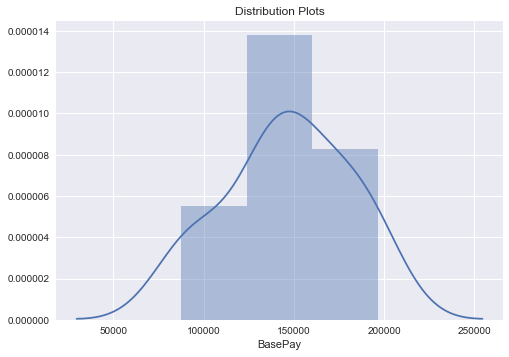

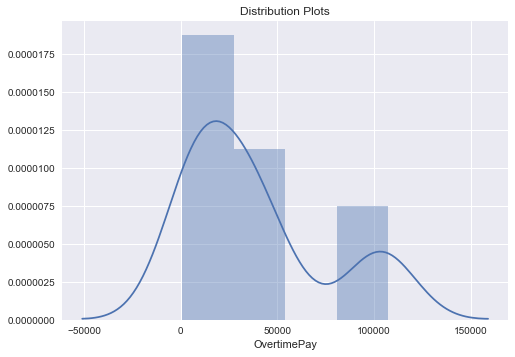

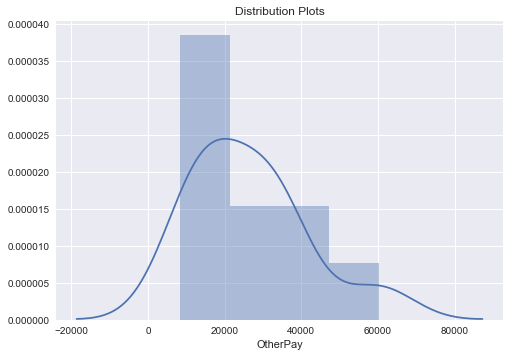

In [82]:
# probability distribution of job family by 
distdata = df.groupby(['JobFamily'])['BasePay','OvertimePay','OtherPay'].mean()

for i in distdata.columns:
    sns.distplot(distdata[i])
    plt.title('Distribution Plots')
    plt.show()

In [118]:
# Distribution by frequency 

# plt.hist(distdata.BasePay, bins=np.arange(distdata.BasePay.min(), distdata.BasePay.max()+1))
# plt.title("Frequency plot for outliers")

In [ ]:
# plt.hist(distdata.BasePay.round(0))i

In [131]:
# distdata.BasePay.plot(kind = 'bar') ## Stopping as something is breaking here 


## Insights: 



In [116]:
distdata

,BasePay,OvertimePay,OtherPay
JobFamily,,,
OTHER,156798.534074,33372.430988,18103.888704
assistant,196376.002143,9396.832857,29637.867857
deputy,186242.174333,10753.904000,12928.184333
engineer,140546.860000,37786.070000,18947.755000
fire,137019.399048,48178.637698,29678.210794
inspector,129776.882500,10725.390000,60259.555000
manager,175279.894375,720.395938,34668.637500
police,151971.765673,22925.709519,36367.947404
technician,99989.200000,99592.440000,14278.643333


# outlier by jobTitle

In [86]:
df.groupby(['JobTitle'])['Id'].count().head(10)

JobTitle
ADMINISTRATOR, SFGH MEDICAL CENTER                   1
ANESTHETIST                                          9
ASSISTANT CHIEF ATTORNEY II                          4
ASSISTANT CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)     2
ASSISTANT DEPUTY CHIEF II                            4
ASSISTANT INSPECTOR (POLICE DEPARTMENT)              1
ASSISTANT INSPECTOR III (POLICE DEPARTMENT)          1
ASSISTANT MEDICAL EXAMINER                           3
BATTALION CHIEF, (FIRE DEPARTMENT)                  35
CAPTAIN III (POLICE DEPARTMENT)                     33
Name: Id, dtype: int64

In [108]:
outlierdata.index.name = 'JobTitle'
outlierdata.reset_index(inplace=True)
# outlierdata

 Below plot shows that the counts from 0 to 5 are the highest in the frequency plots, we can subset them and analyze them


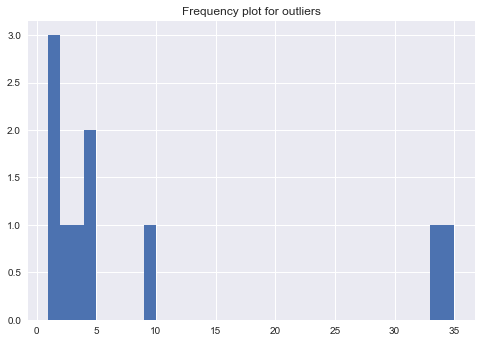

In [110]:
print(" Below plot shows that the counts from 0 to 5 are the highest in the frequency plots, we can subset them and analyze them")
plt.hist(outlierdata.Id, bins=np.arange(outlierdata.Id.min(), outlierdata.Id.max()+1))
plt.title("Frequency plot for outliers")
plt.show()



In [114]:
print("list of the JobTitle who are outliers")
outlierdata[outlierdata.Id <= 5]

list of the JobTitle who are outliers


,Id
JobTitle,
"ADMINISTRATOR, SFGH MEDICAL CENTER",1
ASSISTANT CHIEF ATTORNEY II,4
"ASSISTANT CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)",2
ASSISTANT DEPUTY CHIEF II,4
ASSISTANT INSPECTOR (POLICE DEPARTMENT),1
ASSISTANT INSPECTOR III (POLICE DEPARTMENT),1
ASSISTANT MEDICAL EXAMINER,3


In [115]:
print("Unique Jobtitle outliers")
set(outlierdata[outlierdata.Id <= 5].index)

Unique Jobtitle outliers


{'ADMINISTRATOR, SFGH MEDICAL CENTER',
 'ASSISTANT CHIEF ATTORNEY II',
 'ASSISTANT CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)',
 'ASSISTANT DEPUTY CHIEF II',
 'ASSISTANT INSPECTOR (POLICE DEPARTMENT)',
 'ASSISTANT INSPECTOR III (POLICE DEPARTMENT)',
 'ASSISTANT MEDICAL EXAMINER'}

In [ ]:
## 2 

# calculating the inflation  

## Approach



We take 3 columns, JobTitle, totalpay (2011), totalpay(2014)
Now we groupby the data w.r.t to JobTitles with mean. Here we get unique jobtitles averages over 2011 and 2014.
we take the delta values between 2011 and 2014 values and create a new column 'Delta'
We visualize the two columns i.e. jobtitle and delta by the bar-plots

We do the same approach with the JobFamilies.


In [141]:
import re

In [147]:
fff = " hello  world ! "

In [142]:
re.search("\w+",fff)

<_sre.SRE_Match object; span=(0, 5), match='hello'>

In [143]:
RegexpTokenizer(r'\w+')

RegexpTokenizer(pattern='\\w+', gaps=False, discard_empty=True, flags=56)

In [148]:
fff.strip(" ")

'hello  world !'

In [152]:
fff.split("world")

[' hello  ', ' ! ']

In [153]:
len(s)

153

In [ ]:
dictionary